In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats


In [2]:
from dataloader.dataset import Dataset

dataset = Dataset.from_disk("/Volumes/methlab/Students/Jonathan/results/runs/2024_kw34/20240821_0753_5ff6_feature_sets_cv/20240821_0816_manual_linguistic_features_gpt_5features_slnu/dataset")
dataset.data

/Users/jheitz/miniconda3/envs/dementia/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Created object of class <class 'dataloader.dataset.TabularDataset'>: Dataset Concatenate(ADReSS manual transcripts (train) - Linguistic Features, ADReSS manual transcripts (test) - Linguistic Features) with variables [('data', (156, 45)), ('sample_names', (156,)), ('labels', (156,))], config ({'preprocessors': ['Linguistic Features'], 'debug': False, 'cv_shuffler': <dataloader.cv_shuffler.ADReSSCrossValidationShuffler object at 0x108e56a90>, 'transcript_config': {'only_PAR': True, 'keep_pauses': False, 'keep_terminators': True, 'keep_unintelligable_speech': False, 'insert_pauses_automatic': False}, 'transcript_config_hash': 'ee5faf'})


,lit_pronoun_noun_ratio,lit_verb_noun_ratio,lit_subordinate_coordinate_conjunction_ratio,lit_adverb_ratio,lit_noun_ratio,lit_verb_ratio,lit_pronoun_ratio,lit_personal_pronoun_ratio,lit_determiner_ratio,lit_preposition_ratio,...,lit_flesch_kincaid,lit_avg_distance_between_utterances,lit_prop_utterance_dist_below_05,lit_propositional_density,lit_content_density,Semantic Paraphasias,Impoverished Vocabulary,Discourse Impairment,Word-Finding Difficulties (Anomia),Syntactic Simplification
0,1.300000,1.300000,0.000000,0.078431,0.098039,0.127451,0.127451,0.049020,0.078431,0.039216,...,2.964471,0.180443,0.977778,0.343137,0.362745,2.0,4.0,5.0,5.0,3.0
1,1.206897,0.931034,0.142857,0.019802,0.143564,0.133663,0.173267,0.108911,0.113861,0.049505,...,0.777649,0.178947,0.960145,0.262376,0.321782,2.0,4.0,6.0,6.0,5.0
2,1.428571,1.071429,0.250000,0.052632,0.122807,0.131579,0.175439,0.131579,0.078947,0.026316,...,1.352381,0.192058,0.989011,0.271930,0.324561,2.0,3.0,4.0,4.0,3.0
3,1.444444,0.666667,0.000000,0.051282,0.115385,0.076923,0.166667,0.089744,0.038462,0.012821,...,1.112359,0.309921,0.895238,0.243590,0.333333,4.0,5.0,7.0,6.0,5.0
4,0.176471,0.588235,0.000000,0.043956,0.186813,0.109890,0.032967,0.032967,0.175824,0.032967,...,1.274066,0.252677,0.961538,0.285714,0.373626,1.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.666667,0.500000,0.000000,0.029412,0.176471,0.088235,0.117647,0.088235,0.102941,0.102941,...,1.907395,0.218036,1.000000,0.279412,0.323529,2.0,3.0,5.0,4.0,4.0
152,0.222222,0.388889,0.000000,0.023529,0.211765,0.082353,0.047059,0.011765,0.176471,0.105882,...,6.449412,0.100744,1.000000,0.329412,0.352941,1.0,1.0,1.0,2.0,1.0
153,0.230769,0.538462,0.500000,0.015385,0.200000,0.107692,0.046154,0.000000,0.153846,0.107692,...,2.917582,0.161887,1.000000,0.338462,0.400000,1.0,2.0,3.0,2.0,3.0
154,0.545455,0.727273,0.250000,0.016129,0.177419,0.129032,0.096774,0.032258,0.145161,0.080645,...,3.746686,0.149344,0.981818,0.346774,0.354839,1.0,1.0,2.0,2.0,1.0


In [3]:
df = dataset.data
df['label'] = dataset.labels
df = df[[c for c in df.columns if 'lit_' not in c]]
all_features = df.drop(columns=['label'])
features_dementia = df.query("label == 1").drop(columns=['label'])
features_control = df.query("label == 0").drop(columns=['label'])


In [14]:
raw = pd.melt(df.reset_index(), id_vars=['index','label'], value_vars=list(features_control.columns)).rename(columns={'label': 'Group', 'value': 'Feature value'})
raw['Group'] = raw['Group'].map({1: 'AD', 0: 'Control'})
raw['variable'] = raw['variable'].replace({
    'Semantic Paraphasias': 'SP',
    'Impoverished Vocabulary': 'IV',
    'Word-Finding Difficulties (Anomia)': 'WFD',
    'Syntactic Simplification': 'SS',
    'Discourse Impairment': 'DI',
})
raw = raw.sort_values(by=["variable", "Group"])


In [15]:
means = raw.groupby(['Group', 'variable'])['Feature value'].mean().reset_index().sort_values(by=["variable", "Group"])
medians = raw.groupby(['Group', 'variable'])['Feature value'].median().reset_index().sort_values(by=["variable", "Group"])
means.variable = means.variable.apply(lambda var: means.variable.loc[means.variable == var].index[0])
medians.variable = medians.variable.apply(lambda var: medians.variable.loc[medians.variable == var].index[0])
means

,Group,variable,Feature value
0,AD,0,4.128205
5,Control,0,2.820513
1,AD,1,3.153846
6,Control,1,2.051282
2,AD,2,1.666667
7,Control,2,1.012821
3,AD,3,3.089744
8,Control,3,2.038462
4,AD,4,3.769231
9,Control,4,2.230769


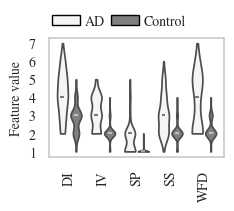

In [17]:
sns.set_theme(rc={'figure.figsize':(2.5,2.5)}, style='whitegrid', color_codes=False)
plt.rcParams["font.family"] = "Times"

my_pal = {"AD": "whitesmoke", "Control": "grey"}

sns.violinplot(data=raw, x="variable", y="Feature value", hue="Group", split=False, gap=.2, inner=None, density_norm='count', cut=0, palette=my_pal)#, inner_kws=dict(box_width=5, whis_width=2, color="darkgrey", alpha=1)) #, inner_kws=dict(box_width=5, whis_width=2, color="black", alpha=0.4))
plt.scatter(data=medians, x=np.where(medians.Group == 'AD', medians.variable - 0.20, medians.variable + 0.20), y="Feature value", c=np.where(medians.Group == 'AD', 'black', 'white'), s=8, marker="_", alpha=0.5)
plt.xticks(rotation=90, fontsize=10) # , ha='right', rotation_mode='anchor'
plt.xlabel("")
plt.yticks(range(1,8), fontsize=10)
plt.grid(False)
plt.ylabel("Feature value", fontsize=10)

patches = []
for group in my_pal:
    patches.append(mpatches.Patch(facecolor=my_pal[group], label=group, linewidth=1, edgecolor='black'))
#blue_patch = mpatches.Patch(color='#5975A4', label='AD')
#orange_patch = mpatches.Patch(color='#CC8963', label='Control')
plt.legend(handles=patches, fontsize=10, ncol=3, loc='upper center', bbox_to_anchor=(0.4,1.3), columnspacing=0.5, frameon=False, handletextpad=0.3)

plt.tight_layout()
plt.savefig("plots/feature_distribution_gpt_features.png")
plt.savefig("plots/feature_distribution_gpt_features.pdf")

In [6]:
raw.groupby(['variable', 'Group']).describe()

index                                                   \
                 count       mean        std   min    25%   50%     75%   
variable Group                                                            
DI       AD       78.0  58.487179  50.528311   0.0  19.25  38.5  115.75   
         Control  78.0  96.512821  28.688540  54.0  73.25  92.5  117.00   
IV       AD       78.0  58.487179  50.528311   0.0  19.25  38.5  115.75   
         Control  78.0  96.512821  28.688540  54.0  73.25  92.5  117.00   
SP       AD       78.0  58.487179  50.528311   0.0  19.25  38.5  115.75   
         Control  78.0  96.512821  28.688540  54.0  73.25  92.5  117.00   
SS       AD       78.0  58.487179  50.528311   0.0  19.25  38.5  115.75   
         Control  78.0  96.512821  28.688540  54.0  73.25  92.5  117.00   
WFD      AD       78.0  58.487179  50.528311   0.0  19.25  38.5  115.75   
         Control  78.0  96.512821  28.688540  54.0  73.25  92.5  117.00   

                        Feature value                                          \
                    max         count      mean       std  min  25%  50%  75%   
variable Group                                                                  
DI       AD       153.0          78.0  4.128205  1.272680  2.0  3.0  4.0  5.0   
         Control  155.0          78.0  2.820513  0.751511  1.0  2.0  3.0  3.0   
IV       AD       153.0          78.0  3.153846  0.898439  2.0  2.0  3.0  4.0   
         Control  155.0          78.0  2.051282  0.452911  1.0  2.0  2.0  2.0   
SP       AD       153.0          78.0  1.666667  0.816497  1.0  1.0  2.0  2.0   
         Control  155.0          78.0  1.012821  0.113228  1.0  1.0  1.0  1.0   
SS       AD       153.0          78.0  3.089744  1.071301  1.0  2.0  3.0  4.0   
         Control  155.0          78.0  2.038462  0.495232  1.0  2.0  2.0  2.0   
WFD      AD       153.0          78.0  3.769231  1.528288  2.0  2.0  4.0  5.0   
         Control  155.0          78.0  2.230769  0.556498  1.0  2.0  2.0  2.0   

                       
                  max  
variable Group         
DI       AD       7.0  
         Control  5.0  
IV       AD       5.0  
         Control  4.0  
SP       AD       5.0  
         Control  2.0  
SS       AD       6.0  
         Control  4.0  
WFD      AD       7.0  
         Control  4.0

In [7]:
raw.groupby(['variable', 'Group']).count()

index  Feature value
variable Group                        
DI       AD          78             78
         Control     78             78
IV       AD          78             78
         Control     78             78
SP       AD          78             78
         Control     78             78
SS       AD          78             78
         Control     78             78
WFD      AD          78             78
         Control     78             78

In [8]:
feature_names = all_features.columns
positions_dementia = [i * 3 for i in range(len(feature_names))]
positions_control = [i * 3 + 1 for i in range(len(feature_names))]
tick_positions = [i * 3 + 0.5 for i in range(len(feature_names))]

mean = all_features.mean(axis=0)
std = all_features.std(axis=0)

# pooled std, which should be used for Cohen's d (cf. https://en.wikipedia.org/wiki/Effect_size#Cohen's_d)
dementia_var, control_var = features_dementia.var(axis=0, ddof=1), features_control.var(axis=0, ddof=1)
dementia_n, control_n = features_dementia.shape[0], features_control.shape[0]
pooled_std = np.sqrt(((dementia_n - 1) * dementia_var + (control_n - 1) * control_var) / (dementia_n + control_n - 2))

# normalized values 
dementia_normalized = (features_dementia - mean) / pooled_std
control_normalized = (features_control - mean) / pooled_std

# diff = cohen's d
diff = dementia_normalized.mean() - control_normalized.mean()  
sorted_features = list(diff.sort_values(key=abs, ascending=False).index)
diff = diff[sorted_features]

# sorted
dementia_normalized = dementia_normalized[sorted_features]
control_normalized = control_normalized[sorted_features]
dementia_raw = features_dementia[sorted_features]
control_raw = features_control[sorted_features]

# statistical tests of significance
t_test = {} # first version of paper - criticized by one reviewer
ordinal_test = {}  # new version - we will use a different statistical test (Mann-Whitney U Test) to adequately deal with the fact that our GPT features are on an ordinal scale
for f in sorted_features:
    t_test[f] = stats.ttest_ind(dementia_raw[f], control_raw[f], equal_var=False).pvalue
    ordinal_test[f] = stats.mannwhitneyu(dementia_raw[f], control_raw[f]).pvalue
    
results = pd.DataFrame({
    "Cohen's d": diff,
    "AD mean": dementia_raw.mean(),
    "AD std": dementia_raw.std(),
    "Control mean": control_raw.mean(),
    "Control std": control_raw.std(),
    "p-value": t_test,
    "p-value_new": ordinal_test,
})
results['AD'] = results.apply(lambda row: f"{row['AD mean']:.1f} $\\pm$ {row['AD std']:.1f}", axis=1)
results['Control'] = results.apply(lambda row: f"{row['Control mean']:.1f} $\\pm$ {row['Control std']:.1f}", axis=1)
results["Cohen's d"] = results["Cohen's d"].apply(lambda x: f"{x:.2f}")
results["p-value"] = results["p-value"].apply(lambda x: f"{x:.1e}")
results["p-value_new"] = results["p-value_new"].apply(lambda x: f"{x:.1e}")
results = results[["Cohen's d", "AD", "Control", "p-value", "p-value_new"]]
results

,Cohen's d,AD,Control,p-value,p-value_new
Impoverished Vocabulary,1.55,3.2 $\pm$ 0.9,2.1 $\pm$ 0.5,1.6e-16,1.9e-15
Word-Finding Difficulties (Anomia),1.34,3.8 $\pm$ 1.5,2.2 $\pm$ 0.6,4.7e-13,8.8e-11
Syntactic Simplification,1.26,3.1 $\pm$ 1.1,2.0 $\pm$ 0.5,2.9e-12,1.9e-12
Discourse Impairment,1.25,4.1 $\pm$ 1.3,2.8 $\pm$ 0.8,2.0e-12,6.3e-11
Semantic Paraphasias,1.12,1.7 $\pm$ 0.8,1.0 $\pm$ 0.1,6.9e-10,7.8e-13


In [9]:
print(results.to_latex())

\begin{tabular}{llllll}
\toprule
 & Cohen's d & AD & Control & p-value & p-value_new \\
\midrule
Impoverished Vocabulary & 1.55 & 3.2 $\pm$ 0.9 & 2.1 $\pm$ 0.5 & 1.6e-16 & 1.9e-15 \\
Word-Finding Difficulties (Anomia) & 1.34 & 3.8 $\pm$ 1.5 & 2.2 $\pm$ 0.6 & 4.7e-13 & 8.8e-11 \\
Syntactic Simplification & 1.26 & 3.1 $\pm$ 1.1 & 2.0 $\pm$ 0.5 & 2.9e-12 & 1.9e-12 \\
Discourse Impairment & 1.25 & 4.1 $\pm$ 1.3 & 2.8 $\pm$ 0.8 & 2.0e-12 & 6.3e-11 \\
Semantic Paraphasias & 1.12 & 1.7 $\pm$ 0.8 & 1.0 $\pm$ 0.1 & 6.9e-10 & 7.8e-13 \\
\bottomrule
\end{tabular}

